In [1]:
from tensorflow import keras
print("Keras Version", keras.__version__)

Keras Version 2.7.0


In [2]:
model = keras.models.load_model('./asset/DepthEstimationModel')

In [3]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

images = []
for f in glob.glob("./asset/image/*.jpg"):
    images.append(np.asarray(Image.open(f).resize((256, 256)), dtype=np.float32)/255)
images = np.array(images)


In [4]:
pred = model.predict(images)

<ipython-input-5-2a3cd4f9304c>:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_bad(color="black")


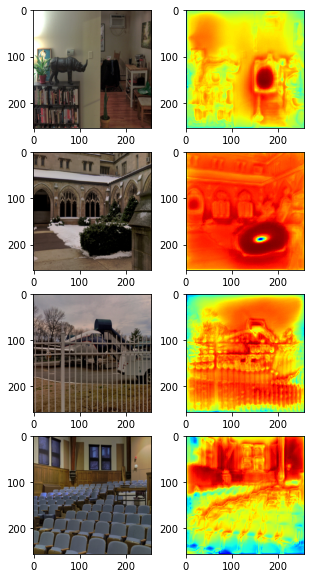

In [5]:
cmap = plt.cm.jet
cmap.set_bad(color="black")


fig, ax = plt.subplots(4, 2, figsize=(5, 10))


for i in range(4):
    ax[i, 0].imshow(np.array(images[i]))
    ax[i, 1].imshow((pred[i].squeeze()), cmap=cmap)
# ax[0, 0].imshow(pred[0].squeeze(), cmap=cmap)

plt.show()

In [10]:
pred[0].shape

(256, 256, 1)

(-0.5, 255.5, 255.5, -0.5)

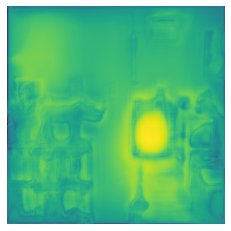

In [16]:
plt.imshow(pred[0])
plt.axis('off')

In [18]:
import cv2

cv2.imread(pred[0])

TypeError: Can't convert object of type 'numpy.ndarray' to 'str' for 'filename'